In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("syedjaferk/indias-weather-data")

print("Path to dataset files:", path)

/SASTRA-NEW-CLUSTER/users/baari/miniconda3/envs/research_credits/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /SASTRA-NEW-CLUSTER/users/baari/.cache/kagglehub/datasets/syedjaferk/indias-weather-data/versions/1
Path to dataset files: /SASTRA-NEW-CLUSTER/users/baari/.cache/kagglehub/datasets/syedjaferk/indias-weather-data/versions/1


In [1]:
!ls $path


 best_spatial_model.pt
 final_spatial_model.pt
 India_Weather_Research_Credit_SPATIAL_Novelty.ipynb
 model-10.pt
 model-11.pt
 model-12.pt
 model-13.pt
 model-14.pt
 model-1.pt
 model-2.pt
 model-3.pt
 model-4.pt
 model-5.pt
 model-6.pt
 model-7.pt
 model-8.pt
 model-9.pt
 models
'Weather Spatial Novelty.txt'


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(path + "/weather_data.csv")
df.head()

,id,city_name,city_id,latitude,longitude,dt_txt,temp,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,main,description,clouds,wind_speed,wind_degree,region,state
0,103348,Amarawati,1263594,16.0,76.96,2020-01-29 08:30:00+05:30,23.45,23.45,23.45,1016,1016,971,59,Clouds,scattered clouds,44,2.83,312,West\n,Maharashtra
1,103349,Amarawati,1263594,16.0,76.96,2020-01-29 11:30:00+05:30,27.91,27.91,27.91,1015,1015,971,42,Clouds,few clouds,22,1.95,297,West\n,Maharashtra
2,103350,Amarawati,1263594,16.0,76.96,2020-01-29 14:30:00+05:30,31.14,31.14,31.14,1010,1010,967,34,Clear,clear sky,0,2.93,234,West\n,Maharashtra
3,103351,Amarawati,1263594,16.0,76.96,2020-01-29 17:30:00+05:30,30.94,30.94,30.94,1010,1010,966,32,Clear,clear sky,0,1.15,246,West\n,Maharashtra
4,103352,Amarawati,1263594,16.0,76.96,2020-01-29 20:30:00+05:30,26.14,26.14,26.14,1012,1012,968,41,Clear,clear sky,0,1.68,65,West\n,Maharashtra


**Taking only Tamil Nadu into account**

In [4]:
#TN = df[df['state'] == 'Tamil Nadu']
TN = df
TN.head()

,id,city_name,city_id,latitude,longitude,dt_txt,temp,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,main,description,clouds,wind_speed,wind_degree,region,state
0,103348,Amarawati,1263594,16.0,76.96,2020-01-29 08:30:00+05:30,23.45,23.45,23.45,1016,1016,971,59,Clouds,scattered clouds,44,2.83,312,West\n,Maharashtra
1,103349,Amarawati,1263594,16.0,76.96,2020-01-29 11:30:00+05:30,27.91,27.91,27.91,1015,1015,971,42,Clouds,few clouds,22,1.95,297,West\n,Maharashtra
2,103350,Amarawati,1263594,16.0,76.96,2020-01-29 14:30:00+05:30,31.14,31.14,31.14,1010,1010,967,34,Clear,clear sky,0,2.93,234,West\n,Maharashtra
3,103351,Amarawati,1263594,16.0,76.96,2020-01-29 17:30:00+05:30,30.94,30.94,30.94,1010,1010,966,32,Clear,clear sky,0,1.15,246,West\n,Maharashtra
4,103352,Amarawati,1263594,16.0,76.96,2020-01-29 20:30:00+05:30,26.14,26.14,26.14,1012,1012,968,41,Clear,clear sky,0,1.68,65,West\n,Maharashtra


In [5]:
TN.shape

(5634122, 20)

## Time Stuff

In [6]:
TN['dt_txt'] = pd.to_datetime(TN['dt_txt'])
# TN = TN.set_index('dt_txt').sort_index()

In [7]:
TN.head()

,id,city_name,city_id,latitude,longitude,dt_txt,temp,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,main,description,clouds,wind_speed,wind_degree,region,state
0,103348,Amarawati,1263594,16.0,76.96,2020-01-29 08:30:00+05:30,23.45,23.45,23.45,1016,1016,971,59,Clouds,scattered clouds,44,2.83,312,West\n,Maharashtra
1,103349,Amarawati,1263594,16.0,76.96,2020-01-29 11:30:00+05:30,27.91,27.91,27.91,1015,1015,971,42,Clouds,few clouds,22,1.95,297,West\n,Maharashtra
2,103350,Amarawati,1263594,16.0,76.96,2020-01-29 14:30:00+05:30,31.14,31.14,31.14,1010,1010,967,34,Clear,clear sky,0,2.93,234,West\n,Maharashtra
3,103351,Amarawati,1263594,16.0,76.96,2020-01-29 17:30:00+05:30,30.94,30.94,30.94,1010,1010,966,32,Clear,clear sky,0,1.15,246,West\n,Maharashtra
4,103352,Amarawati,1263594,16.0,76.96,2020-01-29 20:30:00+05:30,26.14,26.14,26.14,1012,1012,968,41,Clear,clear sky,0,1.68,65,West\n,Maharashtra


In [8]:
TN['time_diff'] = TN.index.to_series().diff()

In [9]:
unique_intervals = TN['time_diff'].unique()
unique_intervals

array([nan,  1.])

# NOVEL

In [12]:
# CUTTING FROM DATAFRAME - SELECTING 100,000
#TN = TN.sample(n=1000000).sort_index()

In [10]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [11]:
# Resample to daily frequency (paper uses monthly)
# Only include numeric features for the mean calculation

# df = TN.select_dtypes(include=np.number).resample('3H').mean().ffill()
# dates = df.index

# Lets keep the spatial data too
df = TN

In [13]:
df.shape

(5634122, 21)

In [14]:
df.head()

,id,city_name,city_id,latitude,longitude,dt_txt,temp,temp_min,temp_max,pressure,...,grnd_level,humidity,main,description,clouds,wind_speed,wind_degree,region,state,time_diff
0,103348,Amarawati,1263594,16.0,76.96,2020-01-29 08:30:00+05:30,23.45,23.45,23.45,1016,...,971,59,Clouds,scattered clouds,44,2.83,312,West\n,Maharashtra,NaN
1,103349,Amarawati,1263594,16.0,76.96,2020-01-29 11:30:00+05:30,27.91,27.91,27.91,1015,...,971,42,Clouds,few clouds,22,1.95,297,West\n,Maharashtra,1.0
2,103350,Amarawati,1263594,16.0,76.96,2020-01-29 14:30:00+05:30,31.14,31.14,31.14,1010,...,967,34,Clear,clear sky,0,2.93,234,West\n,Maharashtra,1.0
3,103351,Amarawati,1263594,16.0,76.96,2020-01-29 17:30:00+05:30,30.94,30.94,30.94,1010,...,966,32,Clear,clear sky,0,1.15,246,West\n,Maharashtra,1.0
4,103352,Amarawati,1263594,16.0,76.96,2020-01-29 20:30:00+05:30,26.14,26.14,26.14,1012,...,968,41,Clear,clear sky,0,1.68,65,West\n,Maharashtra,1.0


In [15]:
## /// SPATIAL ///
def prepare_spatial_data(df, seq_length=12, target_col='temp', feature_cols=None):
    """Process weather data to include spatial information"""
    if feature_cols is None:
        feature_cols = ['temp', 'temp_min', 'temp_max', 'pressure', 'sea_level',
                       'grnd_level', 'humidity', 'clouds', 'wind_speed', 'wind_degree']

    # Convert datetime to consistent format if needed
    if df['dt_txt'].dtype == 'object':
        df['dt_txt'] = pd.to_datetime(df['dt_txt'])

    # Sort by location and time
    df = df.sort_values(['city_id', 'dt_txt'])

    # Group by location
    city_groups = df.groupby('city_id')

    X_list, y_list, coords_list = [], [], []

    # Normalize features for better training
    feature_scaler = MinMaxScaler() # same as paper
    target_scaler = MinMaxScaler()

    # Fit scalers on all data to ensure consistency
    feature_scaler.fit(df[feature_cols])
    target_scaler.fit(df[[target_col]])

    for city_id, group in city_groups:
        # Extract location coordinates
        lat = group['latitude'].iloc[0]
        lon = group['longitude'].iloc[0]

        # Get features and normalize
        features = group[feature_cols].values
        targets = group[target_col].values

        features = feature_scaler.transform(features)
        targets = target_scaler.transform(targets.reshape(-1, 1)).flatten()

        # Create sequences for time series prediction
        for i in range(len(features) - seq_length):
            X_list.append(features[i:i+seq_length])
            y_list.append(targets[i+seq_length])
            coords_list.append(np.array([lat, lon]))

    return np.array(X_list), np.array(y_list), np.array(coords_list), feature_scaler, target_scaler


In [ ]:
X, y, coords, feature_scaler, target_scaler = prepare_spatial_data(df)

In [17]:
# 2. Split data into train/val/test
from sklearn.model_selection import train_test_split

# First split out test set
X_train_val, X_test, y_train_val, y_test, coords_train_val, coords_test = train_test_split(
    X, y, coords, test_size=0.15, random_state=42
)

# Then split training data into train and validation
X_train, X_val, y_train, y_val, coords_train, coords_val = train_test_split(
    X_train_val, y_train_val, coords_train_val, test_size=0.15, random_state=42
)

In [18]:
from torch.utils.data import DataLoader, TensorDataset

In [19]:
# 3. Create PyTorch datasets and dataloaders
train_dataset = TensorDataset(
    torch.FloatTensor(X_train),
    torch.FloatTensor(y_train).unsqueeze(1),
    torch.FloatTensor(coords_train)
)

val_dataset = TensorDataset(
    torch.FloatTensor(X_val),
    torch.FloatTensor(y_val).unsqueeze(1),
    torch.FloatTensor(coords_val)
)

test_dataset = TensorDataset(
    torch.FloatTensor(X_test),
    torch.FloatTensor(y_test).unsqueeze(1),
    torch.FloatTensor(coords_test)
)

In [20]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

In [23]:
# class ClimateCNNLSTM(nn.Module):
#     """Direct implementation from paper sections 2.5 and 3.4"""
#     def __init__(self, input_size, num_features, output_size):
#         super().__init__()
#         # CNN Block (paper uses 2 conv layers)
#         self.conv = nn.Sequential(
#             nn.Conv1d(input_size, 64, kernel_size=3, padding=1), # Added padding=1
#             nn.ReLU(),
#             nn.MaxPool1d(2),
#             nn.BatchNorm1d(64),
#             nn.Conv1d(64, 128, kernel_size=3, padding=1), # Added padding=1
#             nn.ReLU(),
#             nn.MaxPool1d(2)
#         )

#         # LSTM Block (paper uses 100 units)
#         self.lstm = nn.LSTM(input_size=128, hidden_size=100, batch_first=True)

#         # Regression layer
#         self.fc = nn.Sequential(
#             nn.Linear(100, 50),
#             nn.ReLU(),
#             nn.Linear(50, output_size)
#         )

#     def forward(self, x):
#         # Paper's dimension handling
#         x = x.permute(0, 2, 1)  # [batch, features, seq]
#         x = self.conv(x)
#         x = x.permute(0, 2, 1)  # [batch, seq, features]
#         _, (h_n, _) = self.lstm(x)
#         return self.fc(h_n[-1])

In [21]:
class SpatioTemporalCNNLSTM(nn.Module):
    """Enhanced CNN-LSTM with spatial awareness for pan-India weather prediction"""
    def __init__(self, input_size, num_features, output_size, spatial_features=2):
        super().__init__()

        # Spatial embedding branch
        self.spatial_embedding = nn.Sequential(
            nn.Linear(spatial_features, 32),  # Process lat/long
            nn.ReLU(),
            nn.Linear(32, 32)
        )

        # CNN block for temporal feature extraction (unchanged)
        self.conv = nn.Sequential(
            nn.Conv1d(input_size, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.BatchNorm1d(64),
            nn.Conv1d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2)
        )

        # LSTM block for temporal dependencies
        self.lstm = nn.LSTM(input_size=128, hidden_size=100, batch_first=True)

        # Fusion layer to combine spatial and temporal features
        self.fusion = nn.Linear(100 + 32, 64) ## /// NEW ///

        # Output regression layer
        self.fc = nn.Sequential(
            nn.Linear(64, 50),
            nn.ReLU(),
            nn.Linear(50, output_size)
        )

    def forward(self, x, coords):
        # Process spatial coordinates
        spatial_features = self.spatial_embedding(coords)

        # Process temporal data with CNN (same as original)
        x = x.permute(0, 2, 1)  # [batch, features, seq]
        x = self.conv(x)
        x = x.permute(0, 2, 1)  # [batch, seq, features]

        # Process with LSTM
        _, (h_n, _) = self.lstm(x)
        temporal_features = h_n[-1]

        # Fuse spatial and temporal features
        combined = torch.cat([temporal_features, spatial_features], dim=1)
        fused = self.fusion(combined)

        # Final prediction
        return self.fc(fused)



In [22]:
# 4. Initialize and train the model
input_size = X.shape[2]  # Number of features
model = SpatioTemporalCNNLSTM(
    input_size=input_size,
    num_features=input_size,
    output_size=1,
    spatial_features=2
)

In [52]:
def train_spatial_model(model, train_loader, val_loader, epochs=50):
    """Train a spatial-aware weather prediction model"""
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    print("Device:", device)

    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.MSELoss()

    best_val_loss = float('inf')
    patience, patience_counter = 10, 0
    train_losses, val_losses = [], []
    print("Model training starting with device:", device)
    print("Training on", len(train_loader), "batches")

    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0

        i = 0
        for X_batch, y_batch, coords_batch in train_loader:
            X_batch = X_batch.float().to(device)
            y_batch = y_batch.float().to(device)
            coords_batch = coords_batch.float().to(device)

            # Forward pass
            optimizer.zero_grad()
            outputs = model(X_batch, coords_batch)
            loss = criterion(outputs, y_batch)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            

        avg_train_loss = train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation phase
        model.eval()
        val_loss = 0

        with torch.no_grad():
            for X_val, y_val, coords_val in val_loader:
                X_val = X_val.float().to(device)
                y_val = y_val.float().to(device)
                coords_val = coords_val.float().to(device)

                outputs = model(X_val, coords_val)
                loss = criterion(outputs, y_val)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.8f}, Val Loss: {avg_val_loss:.8f}")

        # Early stopping
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            patience_counter = 0
            torch.save(model.state_dict(), 'best_spatial_model.pt')
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break
    
        torch.save(model.state_dict(), f'model-{epoch+1}.pt')

    # Load best model
    model.load_state_dict(torch.load('best_spatial_model.pt'))
    return model, train_losses, val_losses


In [42]:
torch.cuda.empty_cache()
print("CUDA memory cleared")

CUDA memory cleared


In [ ]:
trained_model, train_losses, val_losses = train_spatial_model(
    model, train_loader, val_loader, epochs=100
)

Device: cuda
Model training starting with device: cuda
Training on 127110 batches


In [29]:
torch.save(model.state_dict(), 'final_spatial_model.pt')
print("Model saved as final_spatial_model.pt")

Model saved as final_spatial_model.pt


!pip install basemap

### Distributed

In [27]:
class SpatioTemporalCNNLSTM(nn.Module):
    """Enhanced CNN-LSTM with spatial awareness for pan-India weather prediction"""
    def __init__(self, input_size, num_features, output_size, spatial_features=2):
        super().__init__()

        # Spatial embedding branch
        self.spatial_embedding = nn.Sequential(
            nn.Linear(spatial_features, 32),  # Process lat/long
            nn.ReLU(),
            nn.Linear(32, 32)
        )

        # CNN block for temporal feature extraction (unchanged)
        self.conv = nn.Sequential(
            nn.Conv1d(input_size, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.BatchNorm1d(64),
            nn.Conv1d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2)
        )

        # LSTM block for temporal dependencies
        self.lstm = nn.LSTM(input_size=128, hidden_size=100, batch_first=True)

        # Fusion layer to combine spatial and temporal features
        self.fusion = nn.Linear(100 + 32, 64) ## /// NEW ///

        # Output regression layer
        self.fc = nn.Sequential(
            nn.Linear(64, 50),
            nn.ReLU(),
            nn.Linear(50, output_size)
        )

    def forward(self, x, coords):
        # Process spatial coordinates
        spatial_features = self.spatial_embedding(coords)

        # Process temporal data with CNN (same as original)
        x = x.permute(0, 2, 1)  # [batch, features, seq]
        x = self.conv(x)
        x = x.permute(0, 2, 1)  # [batch, seq, features]

        # Process with LSTM
        _, (h_n, _) = self.lstm(x)
        temporal_features = h_n[-1]

        # Fuse spatial and temporal features
        combined = torch.cat([temporal_features, spatial_features], dim=1)
        fused = self.fusion(combined)

        # Final prediction
        return self.fc(fused)

In [32]:
# filepath: /path/to/load_model.py
import torch

def remove_module_prefix(state_dict, prefix="module.module."):
    new_state_dict = {}
    for key, value in state_dict.items():
        new_key = key.replace(prefix, "")
        new_state_dict[new_key] = value
    return new_state_dict

# Load saved checkpoint
checkpoint = torch.load("best_spatial_model.pt")
new_state_dict = remove_module_prefix(checkpoint)

model = SpatioTemporalCNNLSTM(input_size=input_size, num_features=input_size, output_size=1)  # use correct parameters
model.load_state_dict(new_state_dict)

# Set the model to evaluation mode
model.eval()

print("Model loaded successfully from best_spatial_model.pt")

Model loaded successfully from best_spatial_model.pt


/tmp/ipykernel_2683293/594458326.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("best_spatial_model.pt")


In [ ]:
def visualize_spatial_predictions(model, test_loader, target_scaler=None):
    """Create a map visualization of prediction accuracy across India"""
    import matplotlib.pyplot as plt
    from mpl_toolkits.basemap import Basemap

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.eval()

    all_preds, all_targets, all_coords = [], [], []

    with torch.no_grad():
        for X_test, y_test, coords_test in test_loader:
            X_test = X_test.float().to(device)
            coords_test = coords_test.float().to(device)

            outputs = model(X_test, coords_test)

            all_preds.extend(outputs.cpu().numpy())
            all_targets.extend(y_test.numpy())
            all_coords.extend(coords_test.cpu().numpy())

    # Convert to arrays
    predictions = np.array(all_preds).flatten()
    targets = np.array(all_targets).flatten()
    coords = np.array(all_coords)

    # Inverse transform if applicable
    if target_scaler:
        predictions = target_scaler.inverse_transform(
            predictions.reshape(-1, 1)).flatten()
        targets = target_scaler.inverse_transform(
            targets.reshape(-1, 1)).flatten()

    # Calculate errors
    errors = np.abs(predictions - targets)

    # Create India map
    plt.figure(figsize=(12, 10))
    m = Basemap(projection='merc',
                llcrnrlat=6, urcrnrlat=38,
                llcrnrlon=68, urcrnrlon=98,
                resolution='i')

    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()

    # Convert lat/lon to map coordinates
    x, y = m(coords[:, 1], coords[:, 0])  # lon, lat

    # Create scatter plot with error intensity
    scatter = m.scatter(x, y, c=errors, s=50, cmap='coolwarm',
                       alpha=0.7, edgecolors='k')

    plt.colorbar(scatter, label='Prediction Error')
    plt.title('Spatial Distribution of Prediction Errors')

    return plt


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(model, test_loader, target_scaler=None):
    """Evaluate the model on the test set and return important metrics"""
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.eval()

    all_preds, all_targets = [], []

    with torch.no_grad():
        for X_test, y_test, coords_test in test_loader:
            X_test = X_test.float().to(device)
            coords_test = coords_test.float().to(device)

            outputs = model(X_test, coords_test)

            all_preds.extend(outputs.cpu().numpy())
            all_targets.extend(y_test.numpy())

    # Convert to arrays
    predictions = np.array(all_preds).flatten()
    targets = np.array(all_targets).flatten()

    # Inverse transform if applicable
    if target_scaler:
        predictions = target_scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()
        targets = target_scaler.inverse_transform(targets.reshape(-1, 1)).flatten()

    # Calculate metrics
    mae = mean_absolute_error(targets, predictions)
    mse = mean_squared_error(targets, predictions)
    r2 = r2_score(targets, predictions)

    return mae, mse, r2

# Evaluate the model
mae, mse, r2 = evaluate_model(model, test_loader, target_scaler)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 0.5790
Mean Squared Error (MSE): 0.8217
R-squared (R²): 0.9851


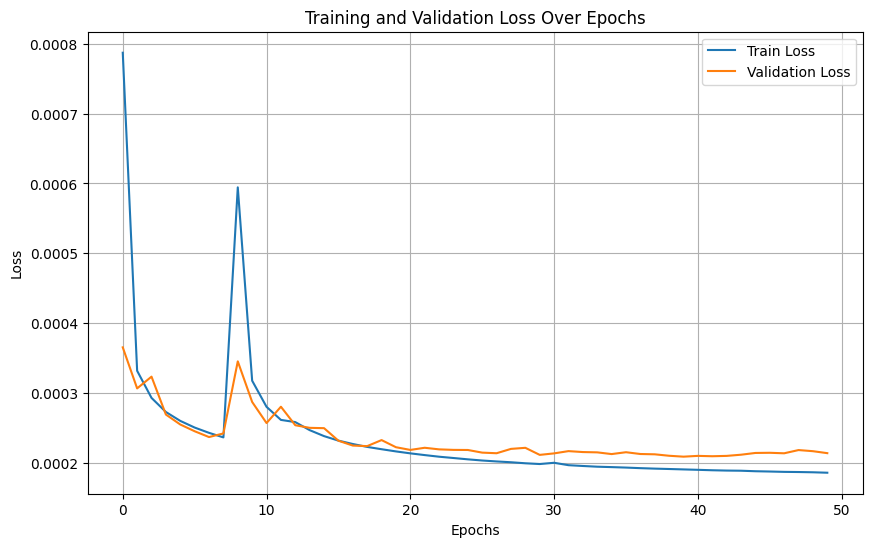

In [ ]:
import re

training_loop = """Epoch 1/50, Train Loss: 0.00078715, Val Loss: 0.00036545
Epoch 2/50, Train Loss: 0.00033191, Val Loss: 0.00030670
Epoch 3/50, Train Loss: 0.00029310, Val Loss: 0.00032350
Epoch 4/50, Train Loss: 0.00027293, Val Loss: 0.00026928
Epoch 5/50, Train Loss: 0.00026019, Val Loss: 0.00025502
Epoch 6/50, Train Loss: 0.00025065, Val Loss: 0.00024537
Epoch 7/50, Train Loss: 0.00024308, Val Loss: 0.00023705
Epoch 8/50, Train Loss: 0.00023656, Val Loss: 0.00024222
Epoch 1/50, Train Loss: 0.00059445, Val Loss: 0.00034540
Epoch 2/50, Train Loss: 0.00031769, Val Loss: 0.00028727
Epoch 3/50, Train Loss: 0.00028030, Val Loss: 0.00025709
Epoch 4/50, Train Loss: 0.00026160, Val Loss: 0.00028047
Epoch 5/50, Train Loss: 0.00025845, Val Loss: 0.00025397
Epoch 6/50, Train Loss: 0.00024694, Val Loss: 0.00025024
Epoch 7/50, Train Loss: 0.00023839, Val Loss: 0.00024978
Epoch 8/50, Train Loss: 0.00023194, Val Loss: 0.00023180
Epoch 9/50, Train Loss: 0.00022711, Val Loss: 0.00022485
Epoch 10/50, Train Loss: 0.00022293, Val Loss: 0.00022409
Epoch 11/50, Train Loss: 0.00021964, Val Loss: 0.00023271
Epoch 12/50, Train Loss: 0.00021650, Val Loss: 0.00022251
Epoch 13/50, Train Loss: 0.00021371, Val Loss: 0.00021864
Epoch 14/50, Train Loss: 0.00021124, Val Loss: 0.00022171
Epoch 15/50, Train Loss: 0.00020892, Val Loss: 0.00021943
Epoch 16/50, Train Loss: 0.00020706, Val Loss: 0.00021869
Epoch 17/50, Train Loss: 0.00020515, Val Loss: 0.00021854
Epoch 18/50, Train Loss: 0.00020348, Val Loss: 0.00021476
Epoch 19/50, Train Loss: 0.00020214, Val Loss: 0.00021389
Epoch 20/50, Train Loss: 0.00020099, Val Loss: 0.00022011
Epoch 21/50, Train Loss: 0.00019952, Val Loss: 0.00022165
Epoch 22/50, Train Loss: 0.00019843, Val Loss: 0.00021154
Epoch 23/50, Train Loss: 0.00020022, Val Loss: 0.00021369
Epoch 24/50, Train Loss: 0.00019679, Val Loss: 0.00021692
Epoch 25/50, Train Loss: 0.00019564, Val Loss: 0.00021558
Epoch 26/50, Train Loss: 0.00019462, Val Loss: 0.00021514
Epoch 27/50, Train Loss: 0.00019403, Val Loss: 0.00021269
Epoch 28/50, Train Loss: 0.00019336, Val Loss: 0.00021534
Epoch 29/50, Train Loss: 0.00019254, Val Loss: 0.00021279
Epoch 30/50, Train Loss: 0.00019186, Val Loss: 0.00021235
Epoch 31/50, Train Loss: 0.00019132, Val Loss: 0.00021027
Epoch 32/50, Train Loss: 0.00019073, Val Loss: 0.00020898
Epoch 33/50, Train Loss: 0.00019015, Val Loss: 0.00021011
Epoch 34/50, Train Loss: 0.00018953, Val Loss: 0.00020960
Epoch 35/50, Train Loss: 0.00018908, Val Loss: 0.00021009
Epoch 36/50, Train Loss: 0.00018886, Val Loss: 0.00021178
Epoch 37/50, Train Loss: 0.00018813, Val Loss: 0.00021429
Epoch 38/50, Train Loss: 0.00018772, Val Loss: 0.00021453
Epoch 39/50, Train Loss: 0.00018722, Val Loss: 0.00021381
Epoch 40/50, Train Loss: 0.00018699, Val Loss: 0.00021843
Epoch 41/50, Train Loss: 0.00018663, Val Loss: 0.00021682
Epoch 42/50, Train Loss: 0.00018600, Val Loss: 0.00021400"""

# Extract train and validation losses from the training loop string
train_losses = []
val_losses = []

for line in training_loop.split('\n'):
    train_loss_match = re.search(r'Train Loss: ([0-9.]+)', line)
    val_loss_match = re.search(r'Val Loss: ([0-9.]+)', line)
    
    if train_loss_match and val_loss_match:
        train_losses.append(float(train_loss_match.group(1)))
        val_losses.append(float(val_loss_match.group(1)))

# Plot the training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

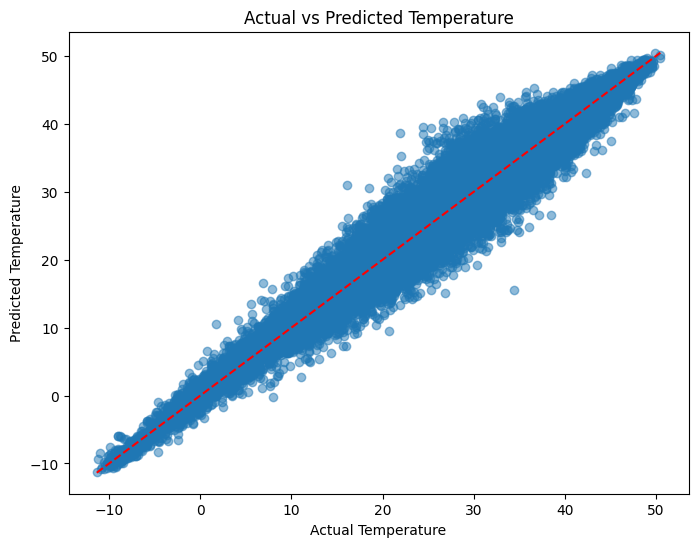

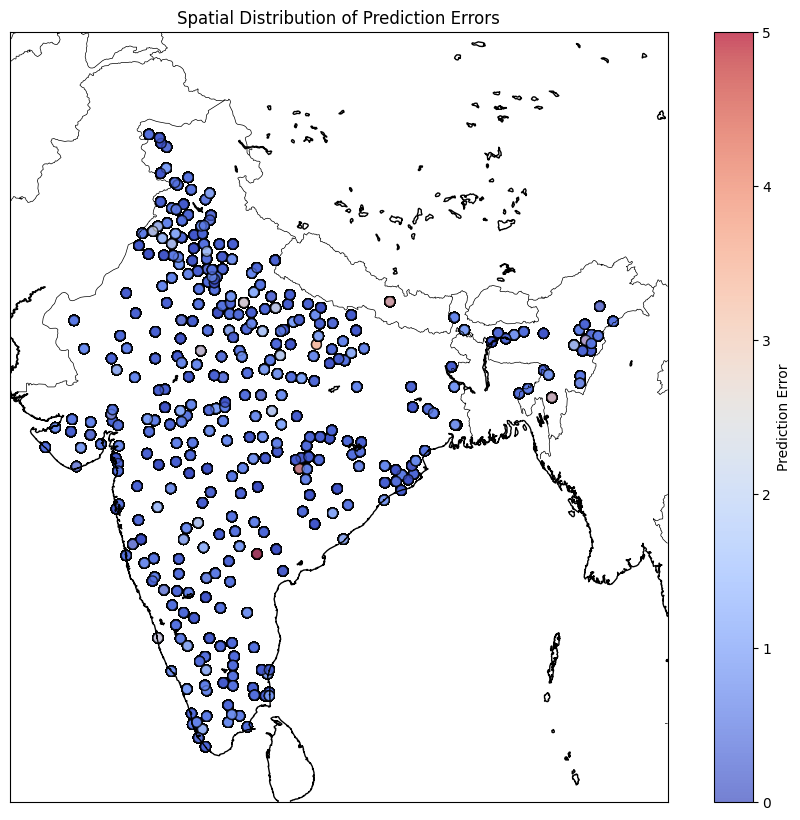

In [43]:
# 5. Evaluate and visualize
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

plt = visualize_spatial_predictions(
    model, test_loader, target_scaler
)
plt.savefig('spatial_prediction_map.png')
plt.show()